# Predicting heart disease using machine leaning 

this notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine leaning model capable of predicting whether or not someone has heart disease based on their medical attributes.

we are going to take the following approach:
1. Problem definition
2. Data 
3. Evaluation 
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

in a statement,
> given clinical parameters about a patient, we can predict wheather or not they have heart disease?

## 2. Data

the original data came from cleavland data from the UCI Machine Learning Repository .
https://archive.ics.uci.edu/dataset/45/heart+disease

there is also a verson of it available on kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> if we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept , we will purse the project.

## 4. Features

This is where you will get different information about each of the features in your data.

**create data dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute


## preparing the tools
i will use matplotlib, pandas and numpy for data manipulation and analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# i want the plots to be inside the notebook

%matplotlib inline

# Models from scikit-learn 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# for model evaluation 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc_curve


## Load data 

In [ ]:
df = pd.read_csv("heart-disease.csv")
df.shape # it shows rows and columns

## Data exploration (exploratory data analysis or EDA)

1. what questions i am trying to solve?
2. what kind of data we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you car about them? 
5. How can you add, change or remove features to get more out of your data?


In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# to find out how many of each class are there
df["target"].value_counts()

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [ ]:
df.info()

In [ ]:
# to check if there any missing values?
df.isna().sum()

In [ ]:
df.describe()

## Heart Disease Frequency according to sex

In [ ]:
df.sex.value_counts()

In [ ]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon", "lightblue"])

plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease , 1 = disease")
plt.ylabel("amount of people")
plt.legend(["female","male"])
plt.xticks(rotation=0); # make 0 and 1 be in vertical

## Age vs. Max Heart Rate for heart disease

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples

plt.scatter(df.age[df.target==1], df.thalach[df.target==1],color="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='cyan');


# Add some helpful info
plt.title("Heart Disease in function of age and max Heart Rate ")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"]);


In [ ]:
# check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type

- chest pain type

• 0: Typical angina: chest pain related decrease blood supply to the heart

• 1: Atypical angina: chest pain not related to heart

• 2: Non-anginal pain: typically esophageal spasms (non heart related)

• 3: Asymptomatic: chest pain not showing signs of disease



In [ ]:
pd.crosstab(df.cp, df.target)

In [ ]:
# Make the crosstap in graph more visual 

pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some titles to make it clear
plt.title("Heart Disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount of people")
plt.legend(["No disease", "disease"])
plt.xticks(rotation=0);


In [ ]:
df.head()

In [ ]:
# Make a correlation matrix
df.corr()

In [ ]:

# to make our correlation matrix a little prettier
corr_matrix = df.corr()

# Create a larger figure
fig, ax = plt.subplots(figsize=(15, 10))

# Use Seaborn's heatmap to display the correlation matrix
sns.heatmap(corr_matrix,
            annot=True,        # Show values on the heatmap
            linewidths=0.5,    # Add linewidth between cells
            fmt=".2f",         # Format values to two decimal places
            cmap="YlGnBu",     # Specify the color map (note the corrected cmap name)
            ax=ax              # Set the axes for the heatmap
           )

# Optional: Add a title to the heatmap
ax.set_title("Correlation Matrix")

plt.show()


In [ ]:
 df.head()

In [ ]:
# Split data into X and Y
x= df.drop("target", axis=1)

y= df["target"]

In [ ]:
x

In [ ]:
y

In [ ]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test sets
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2)


In [ ]:
x_train

In [ ]:
y_train, len(y_train)

now we have got our data split into training and test sets , its time to build a machine learning model.

we will train it to find the patterns on the training set.

and we will test it and use the patterns on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [ ]:
# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores




In [ ]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test   )

model_scores

## model comparision 

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar", color="red")

now we have got a baseline model... and we know a models first predictions aren't always what we should based our next steps off.
what should we do?

* Hypterparameter tuning
* Feature importance
* confusion matrix
* cross-validation
* precision
* recall 
* F1 score
* Classification report
* ROC Curve
* Area under the curve

## Hyperparameter tuning

In [ ]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # FIt the algorithm 
    knn.fit(x_train, y_train)
    
    # update the training scores list 
    train_scores.append(knn.score(x_train, y_train))
    
    # update the test scores list 
    test_scores.append(knn.score(x_test, y_test))
    

In [ ]:
train_scores

In [ ]:
test_scores


In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("model socre")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

We are going to tune:

* LogisticRegression()
* RandomForestClassifier()

....using RandomizedSearchCV

In [ ]:
# Create a hyperparameter grid for logisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]
               }

# Create a hyperparameter grid for RandomFOrestClassifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }

Now we have got hyperparameter grids setup for each of our models, let's tune them using
RandomizedSeachCV....

In [ ]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                               verbose=True
                              )
# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(x_train, y_train)



In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(x_test,y_test)

Now we have tuned LogisticRegression(), let's do the same for 
RandomForestClassifier()....

In [ ]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter seach for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()

rs_rf.fit(x_train,y_train)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)


In [ ]:
model_scores

## Hyperparamter Tuning with GridSearchCV
since our LogisticRegression model provides the best scores so far, we will tryand improve them again uding GridSearchCV...

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                          cv=5,
                          verbose=True
                         )

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train );

In [ ]:
# Check the best hyperparameters
gs_log_reg.best_params_

In [ ]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

In [ ]:
model_scores

## Evaluating our tuned machine learning classifier, beyond accuracy 
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it Would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predection

In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [ ]:
y_preds

In [ ]:
y_test

/Users/besherhasan/Desktop/heart-disease-ml-project/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


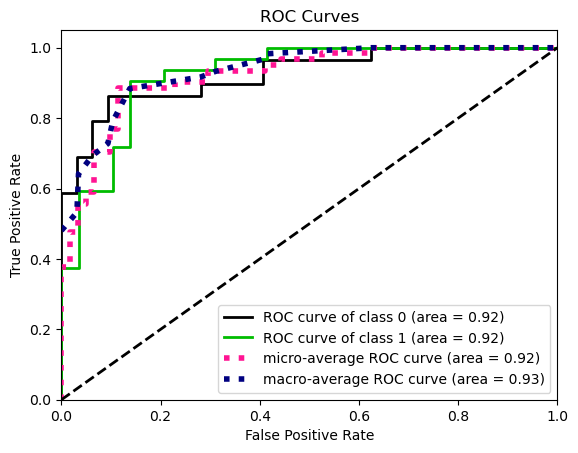

In [169]:
# plot ROC curve and calculate AUC metric
y_probas = gs_log_reg.predict_proba(x_test)  # Get predicted probabilities
plot_roc_curve(y_test, y_probas)
plt.show()

In [170]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


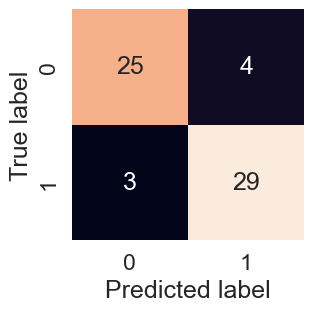

In [177]:
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve , an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1 score 

In [181]:
print(classification_report(y_test, y_preds))
## these data are only calcualted on one test split

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# so we will calculate these metrics using n fold cross validation

we are going to calculate Accuracy, precision, recall and f1-score of our model using 
cross-validation and to do so we will. be using 'cross_val_score() from scikit learn'

In [184]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [185]:
# create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

In [186]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc
# so it gives the values over 5 times so we need to take mean

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [188]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [190]:
# Cross-validated precision
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision= np.mean(cv_precision)
cv_precision

0.8207936507936507

In [191]:
# Cross-validated recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")

cv_recall= np.mean(cv_recall)
cv_recall

0.9212121212121213

In [192]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")

cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

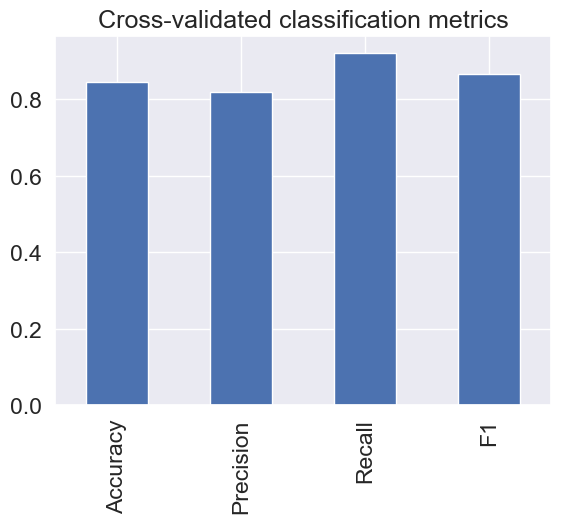

In [195]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1
                          }, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

## Feature importance 
Feature importance is another as asking, "Which features contributed most to the outcomes of the model 
and how did they contribute?"

Finding Feature importance is different for each machine learning model. one way to find feature importance is to search fo the 
"model name " feature importance

now we will find the feature importnace for our LogisticRegression model >>>>...

In [204]:
# fit an instance of LogisticRegression

clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [205]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [206]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict
# this shows how much these values contributes to the target. value

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

<Axes: title={'center': 'Feature Importance'}>

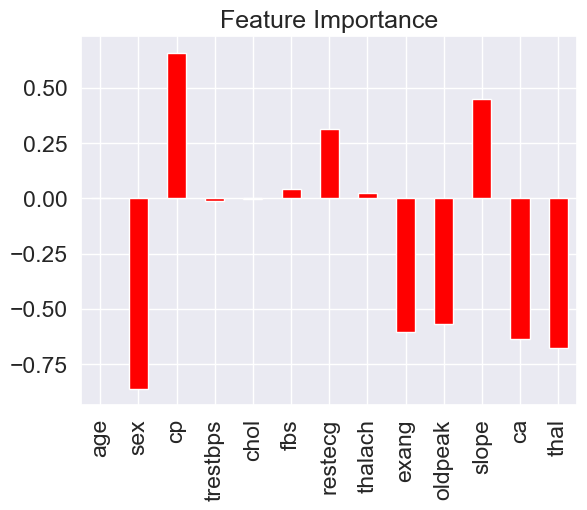

In [208]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, color="red")

In [209]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [210]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

• 0: Upsloping: better heart rate with excercise (uncommon)

• 1: Flatsloping: minimal change (typical healthy heart)

• 2: Downslopins: signs of unhealthy heart

In [249]:
# now i will experiment the data on the model:

patient1 = {
    'age': [45],
    'sex': [1],  # 1 for male, 0 for female
    'cp': [2],   # Chest pain type
    'trestbps': [120],  # Resting blood pressure
    'chol': [200],  # Serum cholesterol
    'fbs': [0],  # Fasting blood sugar (0 or 1)
    'restecg': [0],  # Resting electrocardiographic results
    'thalach': [150],  # Maximum heart rate achieved
    'exang': [0],  # Exercise-induced angina (0 or 1)
    'oldpeak': [0.6],  # ST depression induced by exercise
    'slope': [1],  # Slope of the peak exercise ST segment
    'ca': [0],  # Number of major vessels colored by fluoroscopy
    'thal': [2]  # Thalassemia
}
Patient1_df = pd.DataFrame(patient1)


In [250]:
model = gs_log_reg  # Replace with your trained model
prediction1 = model.predict(Patient1_df)


In [251]:
if prediction1[0] == 1:
    print("The model predicts that the patient has heart disease.")
else:
    print("The model predicts that the patient does not have heart disease.")


The model predicts that the patient has heart disease.
